<a href="https://colab.research.google.com/github/Vishu85vyas/Contraceptivemethod-cmc-/blob/main/cmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import numpy as np
from sklearn import datasets
data=pd.read_csv('Book2.csv',names=['Wife Age','Wife Education','Husband Education','Children',
                                                'Wife religion','Wife working','Husband Occupation','SOLI',
                                                'Media Exposure','Contraceptive Method'])
print(data.head())

   Wife Age  Wife Education  ...  Media Exposure  Contraceptive Method
0        24               2  ...               0                     1
1        45               1  ...               0                     1
2        43               2  ...               0                     1
3        42               3  ...               0                     1
4        36               3  ...               0                     1

[5 rows x 10 columns]


In [ ]:
print(data.info)

<bound method DataFrame.info of       Wife Age  Wife Education  ...  Media Exposure  Contraceptive Method
0           24               2  ...               0                     1
1           45               1  ...               0                     1
2           43               2  ...               0                     1
3           42               3  ...               0                     1
4           36               3  ...               0                     1
...        ...             ...  ...             ...                   ...
1468        33               4  ...               0                     3
1469        33               4  ...               0                     3
1470        39               3  ...               0                     3
1471        33               3  ...               0                     3
1472        17               3  ...               0                     3

[1473 rows x 10 columns]>


In [ ]:
print(data.isna().sum())
print(data.info())
print(data.describe())

Wife Age                0
Wife Education          0
Husband Education       0
Children                0
Wife religion           0
Wife working            0
Husband Occupation      0
SOLI                    0
Media Exposure          0
Contraceptive Method    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife Age              1473 non-null   int64
 1   Wife Education        1473 non-null   int64
 2   Husband Education     1473 non-null   int64
 3   Children              1473 non-null   int64
 4   Wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   Husband Occupation    1473 non-null   int64
 7   SOLI                  1473 non-null   int64
 8   Media Exposure        1473 non-null   int64
 9   Contraceptive Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 

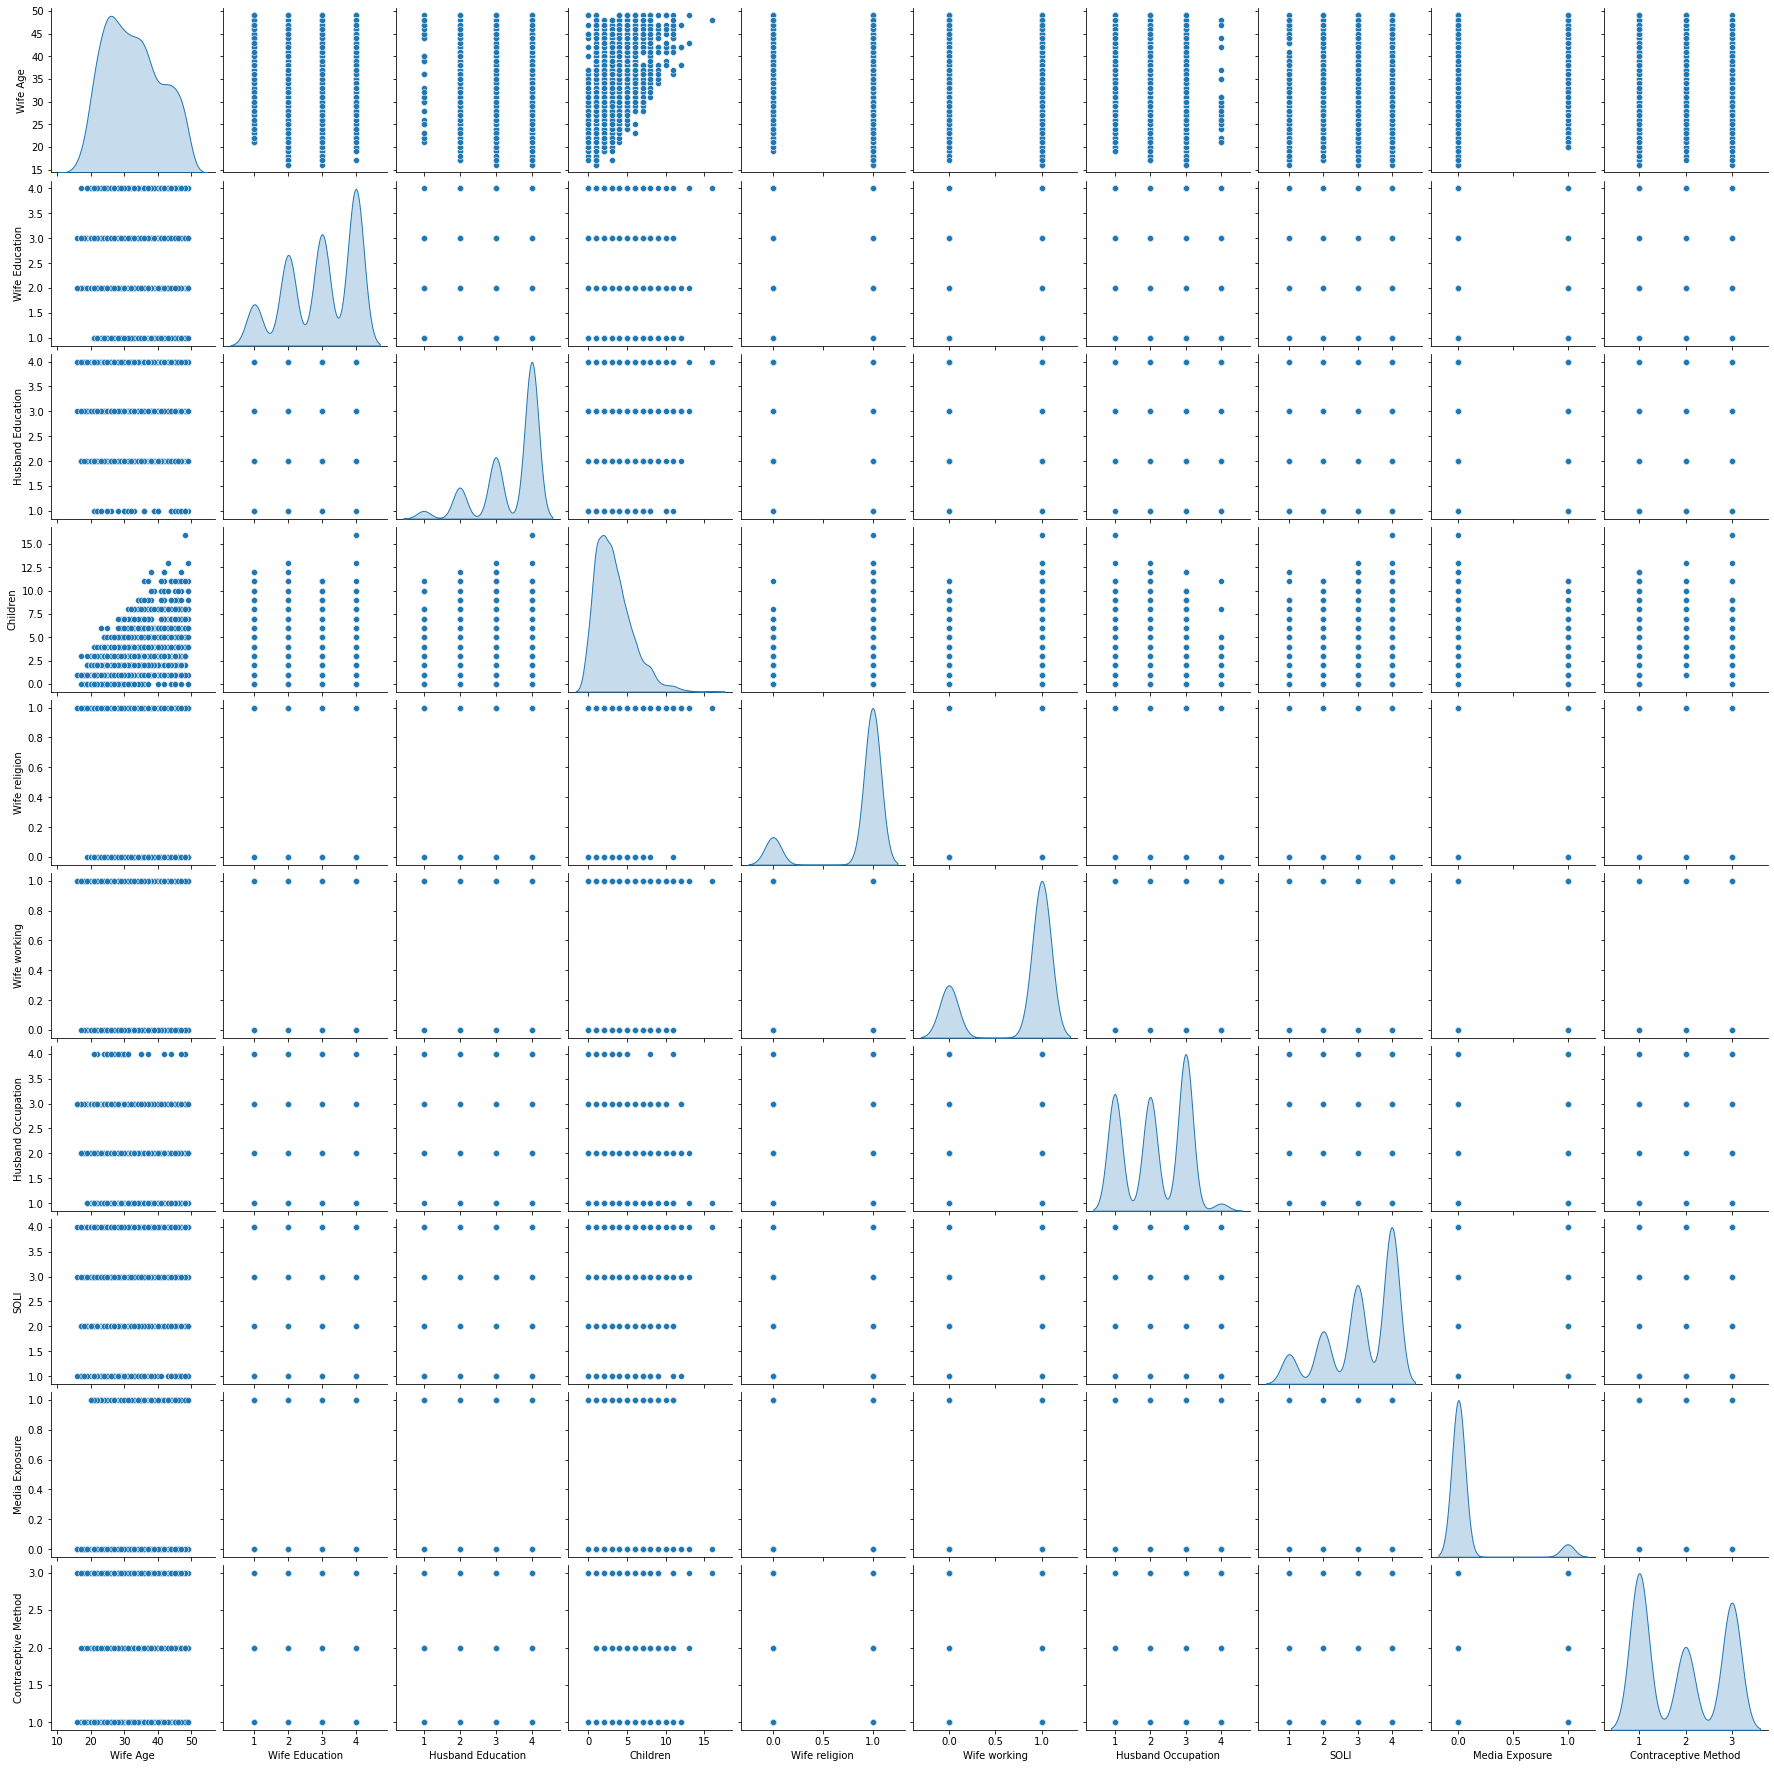

In [ ]:
import seaborn as sns
cols=['Wife Age','Wife Education','Husband Education','Children',
                                                'Wife religion','Wife working','Husband Occupation','SOLI',
                                                'Media Exposure','Contraceptive Method']
sns.pairplot(data[cols],diag_kind='kde')

                      Wife Age  ...  Contraceptive Method
Wife Age              1.000000  ...             -0.162953
Wife Education       -0.048011  ...              0.149777
Husband Education    -0.052879  ...              0.103226
Children              0.540126  ...              0.082772
Wife religion        -0.139543  ...             -0.025271
Wife working         -0.039880  ...              0.054438
Husband Occupation   -0.202532  ...              0.018161
SOLI                  0.184485  ...              0.091149
Media Exposure        0.113306  ...             -0.119206
Contraceptive Method -0.162953  ...              1.000000

[10 rows x 10 columns]


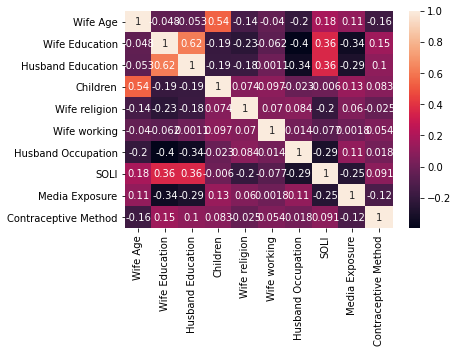

In [ ]:
cor=data[cols].corr()
print(cor)
sns.heatmap(cor,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Contraceptive Method',axis=1)
y=data['Contraceptive Method']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
x_train_std=sc.transform(X_train)
x_test_std=sc.transform(X_test)

In [ ]:
y_test_n = 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
clf1=Perceptron(penalty='l2',eta0=1)
clf2=LogisticRegression(penalty='none',C=10)
clf3=SVC(C=100,kernel='rbf')

In [ ]:
clf=[clf1,clf2,clf3]
clf_names=['Perc','LR','SVM']
test_acc={}
T={}
import time
from sklearn.metrics import accuracy_score
for model,name in zip(clf,clf_names):
  st=time.time()
  model.fit(x_train_std,y_train)
  pred=model.predict(x_test_std)
  et=time.time()
  acc=accuracy_score(y_test,pred)
  test_acc[name]=np.round(acc*100,decimals=1)
  T[name]=np.round((et-st)*1000,decimals=5)
print(test_acc)
print(T)

{'Perc': 46.8, 'LR': 52.5, 'SVM': 50.0}
{'Perc': 7.25079, 'LR': 19.56201, 'SVM': 152.00686}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


dict_keys(['Perc', 'LR', 'SVM'])
dict_values([46.8, 52.5, 50.0])


<BarContainer object of 3 artists>

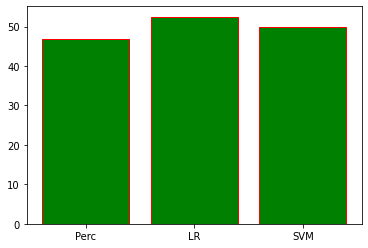

In [ ]:
import matplotlib.pyplot as plt
print(test_acc.keys())
print(test_acc.values())
plt.bar(test_acc.keys(),test_acc.values(),edgecolor='r',color='g')

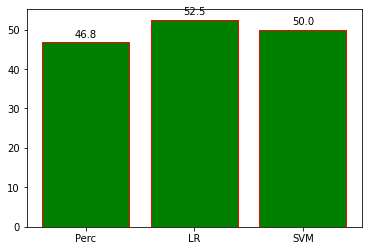

In [ ]:
fig,ax=plt.subplots()
rect=plt.bar(test_acc.keys(),test_acc.values(),edgecolor='r',color='g')
def autolabel(rects):
  for rect in rects:
    height=rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x()+rect.get_width()/2,height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',va='bottom')
autolabel(rect)

Text(0.5, 1.0, 'Time in msec.')

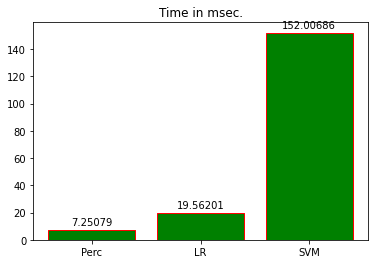

In [ ]:
fig,ax=plt.subplots()
rect=plt.bar(T.keys(),T.values(),edgecolor='r',color='g')
def autolabel(rects):
  for rect in rects:
    height=rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x()+rect.get_width()/2,height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',va='bottom')
autolabel(rect)
plt.title('Time in msec.')

Testing Acc= 0.5
[[105  30  48]
 [ 32  47  35]
 [ 45  31  69]]
              precision    recall  f1-score   support

           1       0.58      0.57      0.58       183
           2       0.44      0.41      0.42       114
           3       0.45      0.48      0.46       145

    accuracy                           0.50       442
   macro avg       0.49      0.49      0.49       442
weighted avg       0.50      0.50      0.50       442



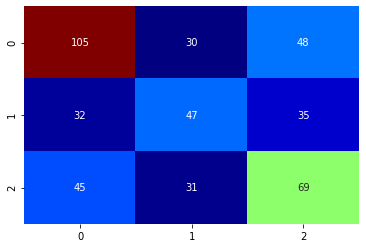

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
acc=accuracy_score(pred,y_test)
print('Testing Acc=',acc)
cm=confusion_matrix(pred,y_test)
print(cm)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='.0f',cbar=False,cmap='jet')
cpr=classification_report(pred,y_test)
print(cpr)

[[105  32  45]
 [ 30  47  31]
 [ 48  35  69]]


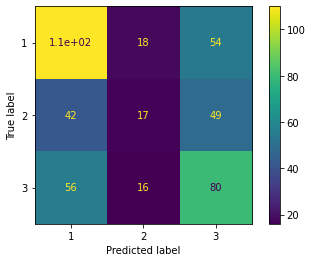

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf1,x_test_std,y_test)

[[105  32  45]
 [ 30  47  31]
 [ 48  35  69]]


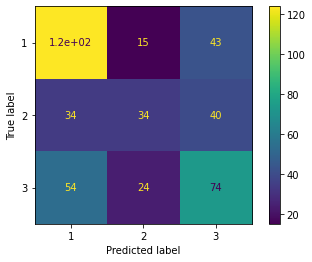

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2,x_test_std,y_test)

[[105  32  45]
 [ 30  47  31]
 [ 48  35  69]]


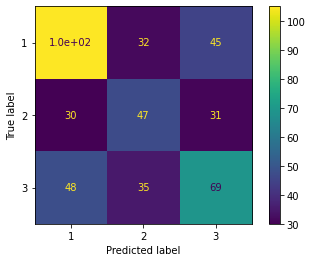

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf3,x_test_std,y_test)

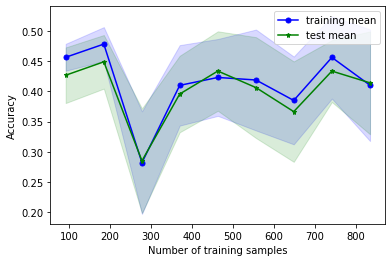

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
train_sizes,train_score,test_score=learning_curve(estimator=clf1,
                                                 X=X_train,y=y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=10)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sk

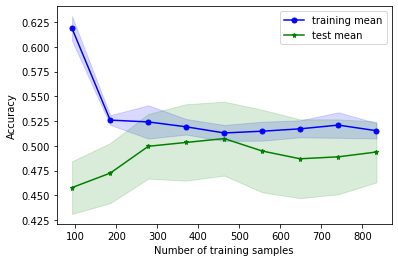

In [ ]:
train_sizes,train_score,test_score=learning_curve(estimator=clf2,
                                                 X=X_train,y=y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=10)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

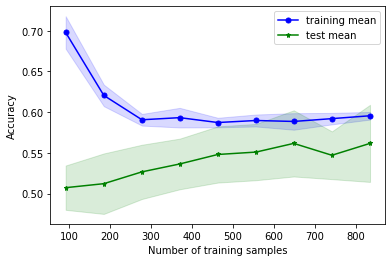

In [ ]:
train_sizes,train_score,test_score=learning_curve(estimator=clf3,
                                                 X=X_train,y=y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=10)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()